## Tabla de Contenidos

1. <a href='#section_Importacion_de_modules'>Importación de modules</a>
2. <a href='#section_Importacion_de_dataset'>Importación del dataset patient_covid.csv</a>
3. <a href='#section_Modelos'>Modelos</a> 
</br>3.1 <a href='#section_KNN'>KNN</a>
</br>3.2 <a href='#section_rl'>Regresión logística</a>
</br>3.3 <a href='#section_nbm'>Naive Bayes multinomial</a>
4. <a href='#section_1'>otro1</a> 

------------
</br>3.1.1. <a href='#section_preparacion'>Preparar la matriz de _features_ y el vector _target_</a>
</br>3.1.1. <a href='#section_optimizando'>Optimizando el valor de _k_</a>
</br>3.1.2. <a href="#section_confusion">Matriz de confusión</a>
</br>3.1.3. <a href="#section_conclusion">Conclusión</a>


# **1. Importación de *modules***
<a id="section_Importacion_de_modules"></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import metrics
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score ,f1_score ,classification_report , confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize, StandardScaler


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")

import funciones as f

# **2. Importación del dataset patient_covid.csv**
<a id="section_Importacion_de_dataset"></a>

In [2]:
data_covid = pd.read_csv("../data/patient_covid.csv", sep = ",", low_memory=False) 
f._get_info(data_covid)

#data_covid_knn = pd.read_csv("../data/patient_covid_knn.csv", sep = ",", low_memory=False) 
data_covid_knn = pd.read_csv("../data/patient_covid.csv", sep = ",", low_memory=False) 
f._get_info(data_covid_knn)

   inpatient  agegroup_10-19  agegroup_20-29  agegroup_30-39  agegroup_40-49  \
0          0               0               0               0               1   
1          0               0               0               0               0   
2          1               0               0               0               0   

   agegroup_50-59  agegroup_60-69  agegroup_70-79  agegroup_80-89  \
0               0               0               0               0   
1               1               0               0               0   
2               1               0               0               0   

   agegroup_90-99  ...  diabetes_Y  hypertension_Y  immunosuppression_Y  \
0               0  ...           0               0                    0   
1               0  ...           0               0                    0   
2               0  ...           1               1                    0   

   obesity_Y  other_diseases_N  other_diseases_Y  pneumonia_Y  pregnant_Y  \
0          0            

# **3.Modelos**
<a id="section_Modelos"></a>

## **3.1. KNN** <a id="section_KNN"></a>

#### ***Preparar la matriz de _features_ y el vector _target_***
<a id="section_preparacion"></a>


In [3]:
data_covid_knn['inpatient'].value_counts(normalize=True)

0    0.734629
1    0.265371
Name: inpatient, dtype: float64

In [4]:
#cols_features=data_covid_knn.columns.difference(['inpatient','agegroup'])
cols_features=data_covid_knn.columns.difference(['inpatient'])
X = data_covid_knn[cols_features]
y = data_covid_knn['inpatient']
X.head(3) 
X.columns

,agegroup_10-19,agegroup_20-29,agegroup_30-39,agegroup_40-49,agegroup_50-59,agegroup_60-69,agegroup_70-79,agegroup_80-89,agegroup_90-99,asthma_Y,...,diabetes_Y,hypertension_Y,immunosuppression_Y,obesity_Y,other_diseases_N,other_diseases_Y,pneumonia_Y,pregnant_Y,sex_M,smoker_Y
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,1,0,0,0,1,0


Index(['agegroup_10-19', 'agegroup_20-29', 'agegroup_30-39', 'agegroup_40-49',
       'agegroup_50-59', 'agegroup_60-69', 'agegroup_70-79', 'agegroup_80-89',
       'agegroup_90-99', 'asthma_Y', 'cardiovascular_Y',
       'chronic_kidney_failure_N', 'chronic_kidney_failure_Y', 'copd_Y',
       'covid_NOA', 'covid_Y', 'diabetes_N', 'diabetes_Y', 'hypertension_Y',
       'immunosuppression_Y', 'obesity_Y', 'other_diseases_N',
       'other_diseases_Y', 'pneumonia_Y', 'pregnant_Y', 'sex_M', 'smoker_Y'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=data_covid['inpatient'])
display(y_train.value_counts(normalize=True).round(2))
display(y_test.value_counts(normalize=True).round(2))

0    0.73
1    0.27
Name: inpatient, dtype: float64

0    0.73
1    0.27
Name: inpatient, dtype: float64

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### ***Modelo Base***

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred).round(2)

KNeighborsClassifier()

0.87

#### ***Optimizando el valor de k***

<font color='red'>cambio temporario de range(10, 31) a range(10, 21)</font>

In [ ]:
# Definimos la estrategia de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=12)
scores_para_df_standard = []

#for i in range(10, 31):
for i in range(15, 26):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    scores_para_df_standard.append(dict_row_score)

In [ ]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores_standard = pd.DataFrame(scores_para_df_standard)
df_scores_standard.head()

Graficando la búsqueda del mejor hiperparámetro

In [ ]:
# Generamos los límites inferior y superior
df_scores_standard['limite_superior'] = df_scores_standard['score_medio'] + df_scores_standard['score_std']
df_scores_standard['limite_inferior'] = df_scores_standard['score_medio'] - df_scores_standard['score_std']
df_scores_standard.head()

In [ ]:
# Graficamos los resultados
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['limite_inferior'], color='r')
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['score_medio'], color='b')
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['limite_superior'], color='r');

In [ ]:
# Identificamos el score máximo
df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max()]

In [ ]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max(), 'n_neighbors'].values[0]
print("best k",best_k)

# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluamos qué accuracy obtenemos en train
print("accuracy_score en train",accuracy_score(y_train, model.predict(X_train)).round(2))

In [ ]:
# Lo utilizamos para predecir en test
X_test = scaler.transform(X_test) # ¡Importantísimo estandarizar también los datos de test con las medias y desvíos aprendidos en train!
y_pred = model.predict(X_test)

# Evaluamos el accuracy del modelo en test
print("accuracy_score en test",accuracy_score(y_test, y_pred).round(2))



<a id="section_confusion"></a>
## Matriz de confusión

In [ ]:
# Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#### **Graficar la matriz de confusión**

In [ ]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(cm, annot=True)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

<img src="http://acnalert.eastus.cloudapp.azure.com/2/ds/Confusion.jpg" alt="Matriz confusion">

In [ ]:
#  calcular  la exactitud de nuestro modelo...
print("Acuracy score KNN :\n", accuracy_score(y_test, y_pred).round(2))
print("Classification report KNN:\n", classification_report(y_test,y_pred_lr))

In [ ]:
probs_lr=lr.predict_proba(x_test)
preds_lr=probs_lr[:,1]
fpr_lr,tpr_lr, threshold_lr =metrics.roc_curve(y_test, y_pred_lr)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)

#graph
plt.title("ROC")

plt.plot(fpr_lr, tpr_lr, 'b', label="KNN" % roc_auc_lr)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="section_conclusion"></a>
## Conclusión

## **3.2. Regresión logística** <a id="section_rl"></a>

In [156]:
print(data_covid.nunique())
print(data_covid.shape)

inpatient                   2
agegroup_10-19              2
agegroup_20-29              2
agegroup_30-39              2
agegroup_40-49              2
agegroup_50-59              2
agegroup_60-69              2
agegroup_70-79              2
agegroup_80-89              2
agegroup_90-99              2
asthma_Y                    2
cardiovascular_Y            2
chronic_kidney_failure_N    2
chronic_kidney_failure_Y    2
copd_Y                      2
covid_NOA                   2
covid_Y                     2
diabetes_N                  2
diabetes_Y                  2
hypertension_Y              2
immunosuppression_Y         2
obesity_Y                   2
other_diseases_N            2
other_diseases_Y            2
pneumonia_Y                 2
pregnant_Y                  2
sex_M                       2
smoker_Y                    2
dtype: int64
(95244, 28)


In [157]:
x=data_covid.drop(["inpatient"],axis=1)
y=data_covid["inpatient"]
y=pd.DataFrame(y)
y

,inpatient
0,0
1,0
2,1
3,1
4,1
...,...
95239,1
95240,1
95241,1
95242,0


In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y)
print ("X_train:" , x_train.shape[0])
print ("y_train:" , y_train.shape[0])
print ("X_test:" , x_test.shape[0])
print ("y_test:" , y_test.shape[0])

X_train: 71433
y_train: 71433
X_test: 23811
y_test: 23811


In [159]:
y_train=pd.DataFrame(y_train)
y_train

,inpatient
48085,0
12710,0
30366,0
51820,0
17245,0
...,...
30336,0
93714,1
30355,0
4357,0


In [160]:
#Logistic regression
#scaler = StandardScaler()
#x_trainstd = scaler.fit_transform(x_train)
#x_teststd = scaler.transform(x_test)
lr = LogisticRegression(class_weight="balance")
lr.fit(x_train, y_train)
score_lr= lr.score(x_test, y_test)

LogisticRegression(class_weight='balance')

In [161]:
print ("Logistic Regression Score:", score_lr)

Logistic Regression Score: 0.8714039729536769


In [162]:
y_pred_lr = lr.predict(x_test)

In [163]:
print("AS LR:\n", accuracy_score(y_test, y_pred_lr))

AS LR:
 0.8714039729536769


In [164]:
print("CM LR:\n", confusion_matrix(y_test, y_pred_lr))

CM LR:
 [[16774   718]
 [ 2344  3975]]


In [165]:
lr.intercept_

array([0.26182382])

In [166]:
lr.coef_

array([[-1.18140537, -1.87049014, -1.79946066, -1.46044135, -1.08770344,
        -0.64175253, -0.18832791,  0.22060432,  0.44470302, -0.12250742,
         0.21203909, -0.00386594,  1.24046799,  0.60407909,  0.45041864,
         0.65004421, -0.8477521 , -0.22640985,  0.18115931,  0.97112078,
         0.1469053 , -0.70970544, -0.19778976,  3.47670476,  1.74328903,
         0.29476918,  0.03785633]])

In [167]:
print("LR:\n", classification_report(y_test,y_pred_lr))

LR:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     17492
           1       0.85      0.63      0.72      6319

    accuracy                           0.87     23811
   macro avg       0.86      0.79      0.82     23811
weighted avg       0.87      0.87      0.86     23811



In [168]:
importance = lr.coef_.flatten()

<BarContainer object of 27 artists>

Text(0.5, 1.0, 'Barplot Summary of Feature Importance')

Text(0.5, 0, 'score')

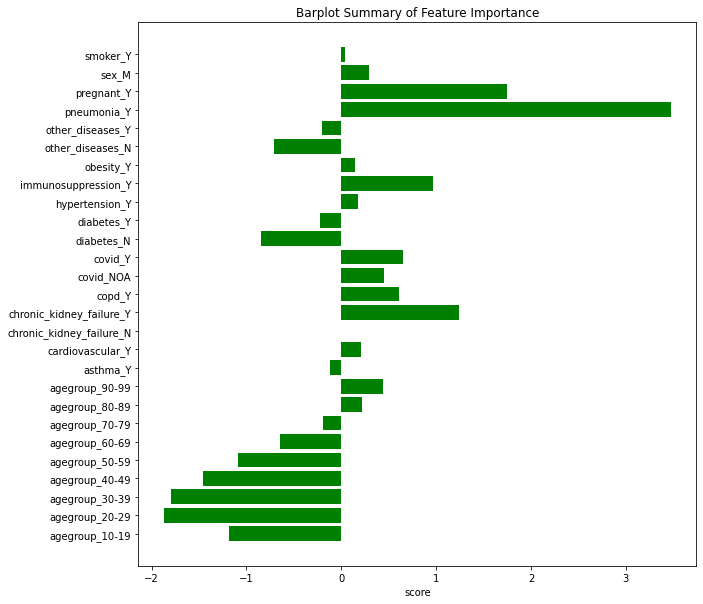

In [169]:
plt.rcParams["figure.figsize"] =(10,10)
plt.barh(x.columns,importance,color="g")
plt.title("Barplot Summary of Feature Importance")
plt.xlabel("score")
plt.show()

In [170]:
#LR
probs_lr=lr.predict_proba(x_test)
preds_lr=probs_lr[:,1]
fpr_lr,tpr_lr, threshold_lr =metrics.roc_curve(y_test, y_pred_lr)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)

Text(0.5, 1.0, 'ROC')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

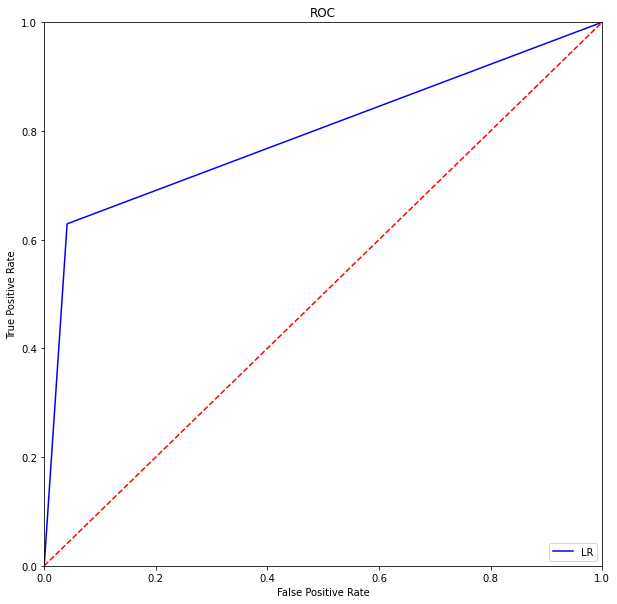

In [171]:
plt.title("ROC")

plt.plot(fpr_lr, tpr_lr, 'b', label="LR" % roc_auc_lr)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4.2.1. Búsqueda y selección del hiperparámetro

##  **3.3. Naive Bayes multinomial**  <a id="section_nbm"></a>

In [172]:
## 4.1.1. Categorización de edad (o no :/)

#  **4.  otro <a id="section_1"></a>**